
# Visualization with Pandas (and Matplotlib)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# change to a different style
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.style.use('classic')

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 14

In [34]:
# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

## Histogram: show the distribution of a numerical variable

In [35]:
# sort the beer column and mentally split it into 3 groups
drinks.beer.sort_values().head()

0     0
40    0
79    0
90    0
97    0
Name: beer, dtype: int64

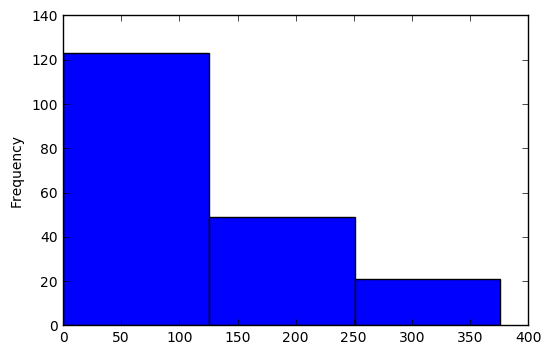

In [36]:
# compare with histogram
drinks.beer.plot(kind='hist', bins=3)

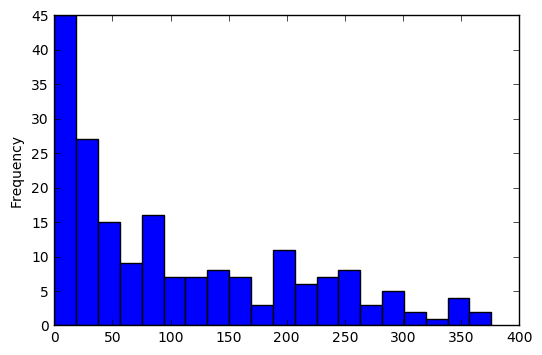

In [37]:
# try more bins
drinks.beer.plot(kind='hist', bins=20)

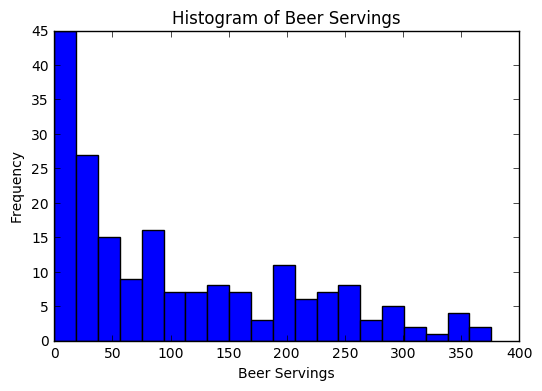

In [38]:
# add title and labels
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

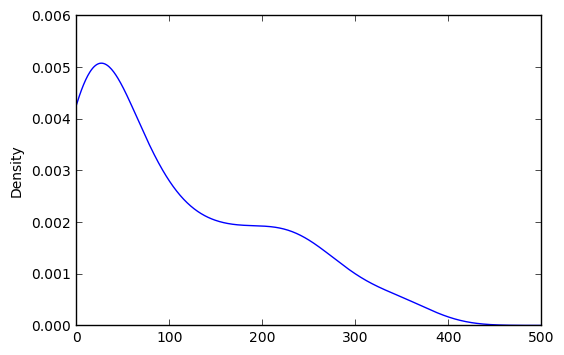

In [39]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

## Scatter Plot: show the relationship between two numerical variables

In [40]:
# select the beer and wine columns and sort by beer
drinks[['beer', 'wine']].sort_values('beer').head()

,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0


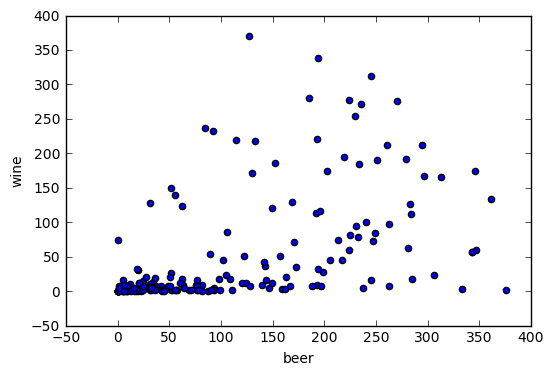

In [41]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

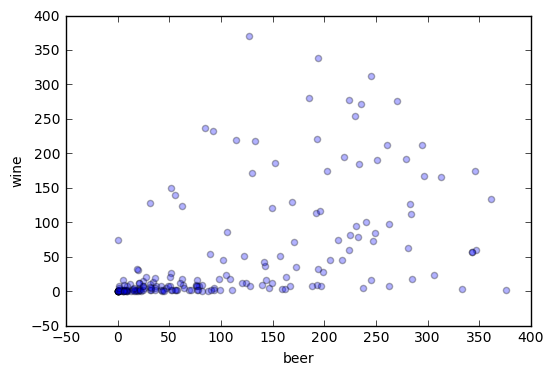

In [42]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3)

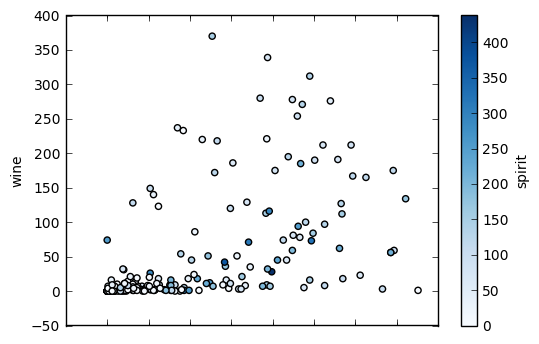

In [43]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012DCA128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000147575C0>]], dtype=object)

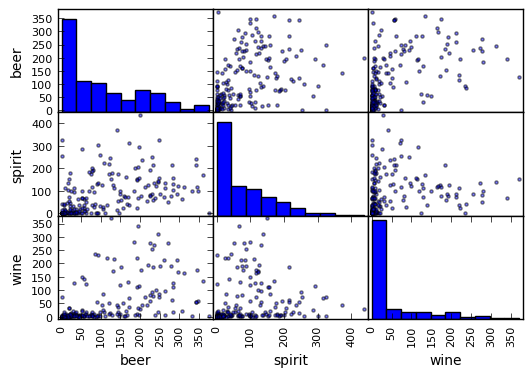

In [44]:
# scatter matrix of three numerical columns
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000148FCB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000156C60F0>]], dtype=object)

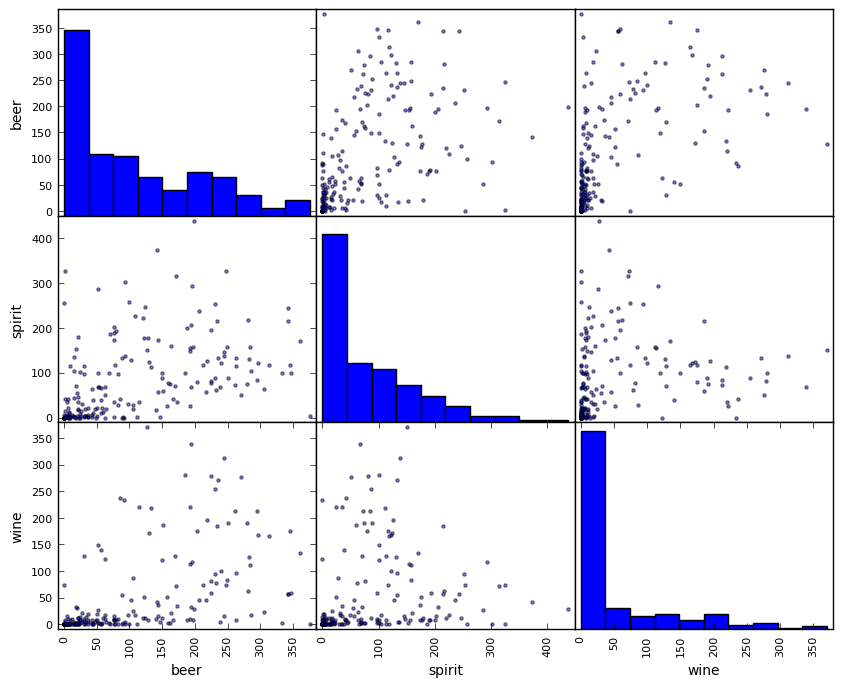

In [45]:
# increase figure size
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8))

## I don't see much correlation between the three but do a Corr() function to confirm

## Bar Plot: show a numerical comparison across different categories

In [46]:
# count the number of countries in each continent
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

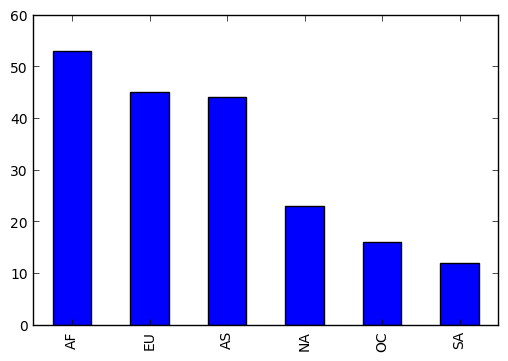

In [47]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar')

In [48]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


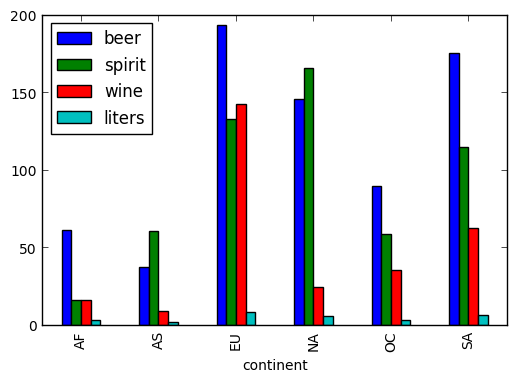

In [49]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

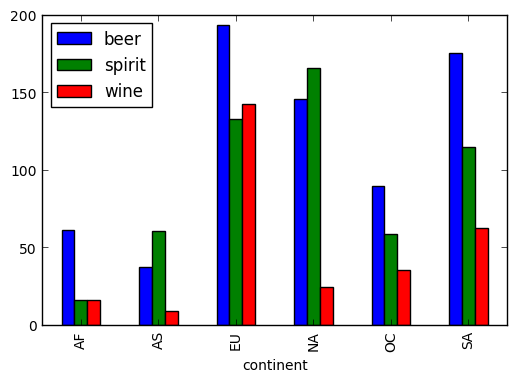

In [50]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

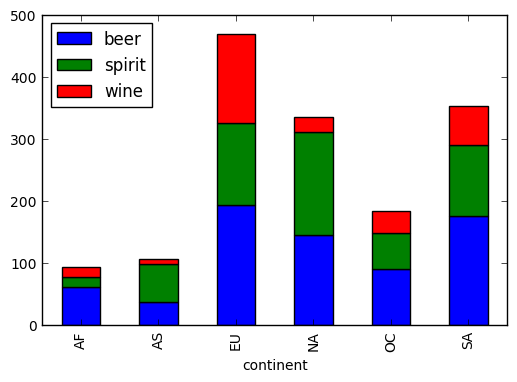

In [51]:
# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

## Box Plot: show quartiles (and outliers) for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [55]:
# sort the spirit column
drinks.spirit.sort_values().head()

0      0
27     0
128    0
118    0
111    0
Name: spirit, dtype: int64

In [56]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

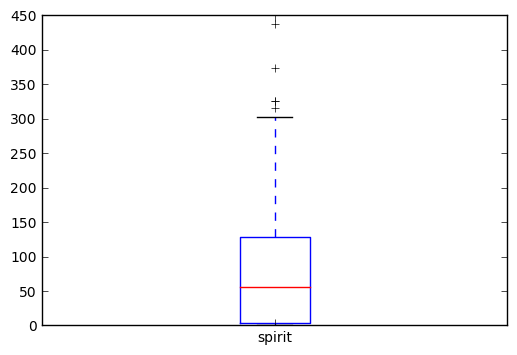

In [57]:
# compare with box plot
drinks.spirit.plot(kind='box')

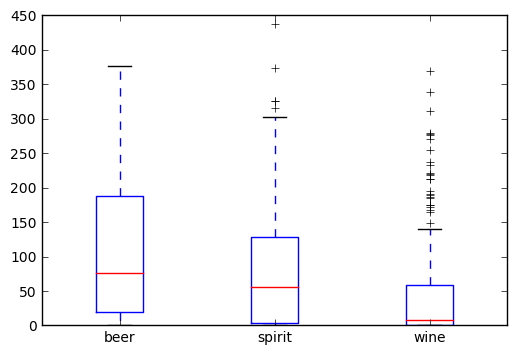

In [58]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box')

### The median for Wine looks suspiciously Low. Do a Median to Confirm
drinks.wine.median()

## Line Plot: show the trend of a numerical variable over time

In [62]:
# read in the ufo data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [63]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, dtype: int64

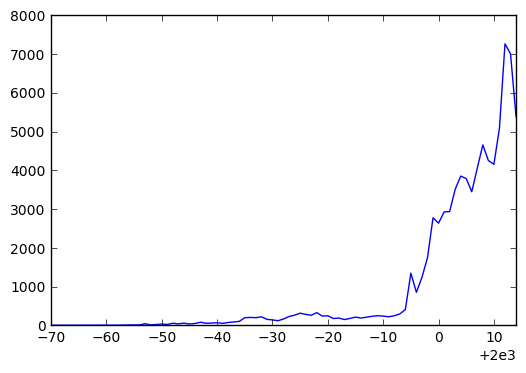

In [64]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot()

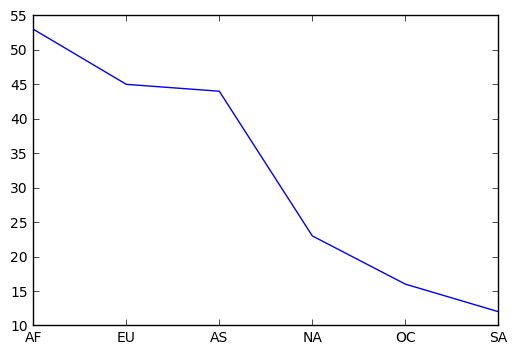

In [65]:
# don't use a line plot when there is no logical ordering
drinks.continent.value_counts().plot()

## Grouped Box Plots: show one box plot for each group

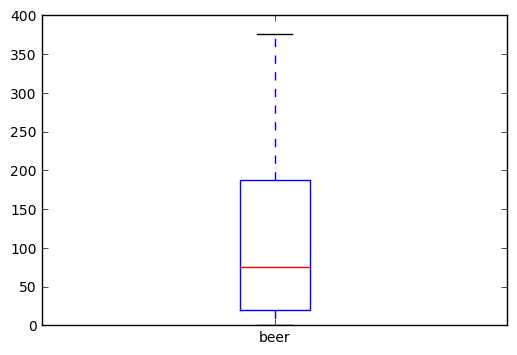

In [66]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box')

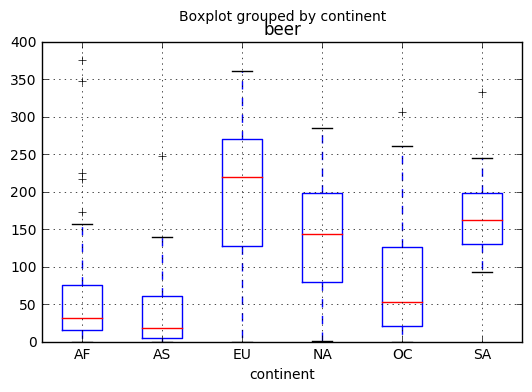

In [67]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001848ED30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000188B24E0>]], dtype=object)

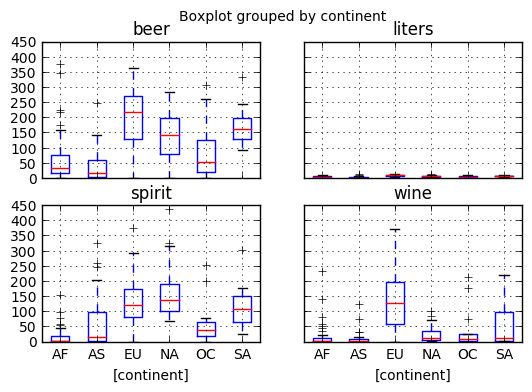

In [68]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent')

## Grouped Histograms: show one histogram for each group

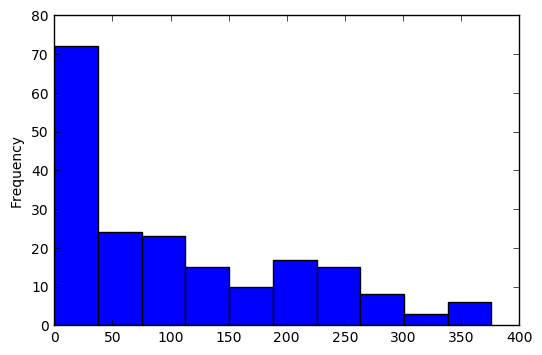

In [69]:
# reminder: histogram of beer servings
drinks.beer.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019667048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019D06B00>]], dtype=object)

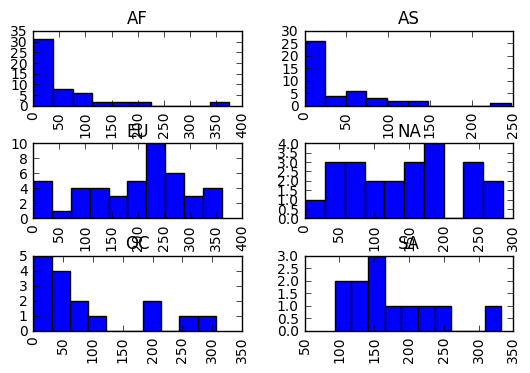

In [70]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A3283C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A8DDDD8>]], dtype=object)

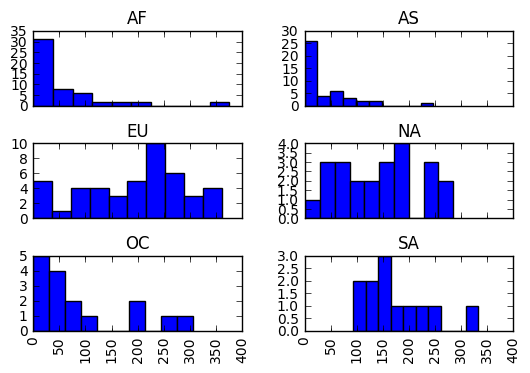

In [71]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B1B6DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B6F97F0>]], dtype=object)

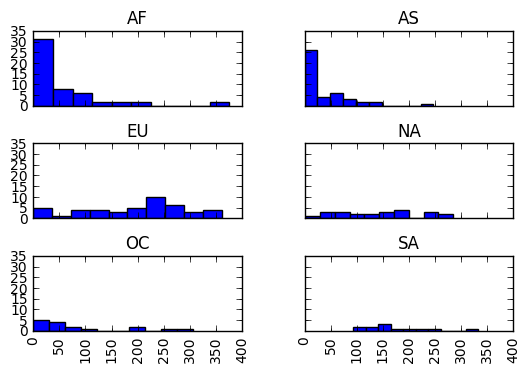

In [72]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C1B6B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C7AA978>]], dtype=object)

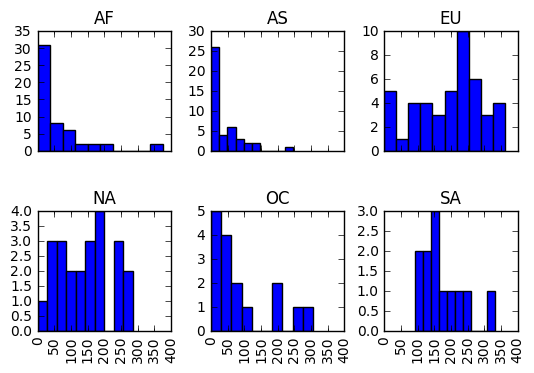

In [73]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

## Assorted Functionality

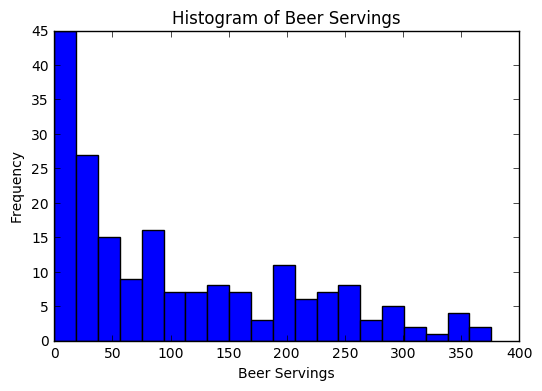

In [74]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

In [75]:
# list available plot styles
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']